In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import requests

In [2]:
def import_data_files():
  r = requests.get('https://raw.githubusercontent.com/rodrigosilupu/DebtRecovery-ContactabilityAnalysis/main/ContactoCobranza.csv')
  with open('./ContactoCobranza.csv', 'wb') as f:
    f.write(r.content)

import_data_files()
print("CSV file has been added")
data = pd.read_csv('./ContactoCobranza.csv', delimiter=";")
data.head()

CSV file has been added


,MES,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ESTATUS,ACTIVACION,MORA,TIPOCONTACTO
0,201402,C00001,NaN,0,0,"<24, 48]",244.86,0.00,245.26,03/02/2014,15.0,3816.34,BT,2012.0,1.0,COEF
1,201402,C00002,<=10,0,0,>48,610.58,612.69,611.54,18/02/2014,9.0,13620.50,BT,2012.0,1.0,COEF
2,201402,C00003,<=10,>0,0,"<24, 48]",2138.73,0.00,NaN,05/02/2014,16.0,18968.50,BT,2013.0,0.0,CNE
3,201402,C00004,>10,0,0,"<24, 48]",323.07,46.85,74.26,24/02/2014,19.0,2459.84,BT,2012.0,0.0,CNE
4,201402,C00005,<=10,0,0,"<24, 48]",920.54,0.00,0.00,12/02/2014,14.0,6591.76,BT,2013.0,0.0,CNE


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8458 entries, 0 to 8457
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MES           8458 non-null   int64  
 1   CLIENTE       8458 non-null   object 
 2   NRO_VEC_COB   6376 non-null   object 
 3   PDPs_ROTAS    8458 non-null   object 
 4   ESTADO_PDP    8458 non-null   int64  
 5   NRO_CUOTAS    7779 non-null   object 
 6   MES_0         8458 non-null   float64
 7   MES_1         8458 non-null   float64
 8   MES_2         7557 non-null   float64
 9   FECHALLAMADA  8458 non-null   object 
 10  HORA          8458 non-null   float64
 11  DEUDA_TOTAL   8458 non-null   float64
 12  ESTATUS       8458 non-null   object 
 13  ACTIVACION    8458 non-null   float64
 14  MORA          8458 non-null   float64
 15  TIPOCONTACTO  8458 non-null   object 
dtypes: float64(7), int64(2), object(7)
memory usage: 1.0+ MB


In [4]:
data.duplicated().sum()

0

### Univariate Descriptive Analysis

---

In [5]:
# Análisis descriptivo univariado
descriptive_stats = data.describe(include='all')
descriptive_stats

,MES,CLIENTE,NRO_VEC_COB,PDPs_ROTAS,ESTADO_PDP,NRO_CUOTAS,MES_0,MES_1,MES_2,FECHALLAMADA,HORA,DEUDA_TOTAL,ESTATUS,ACTIVACION,MORA,TIPOCONTACTO
count,8458.000000,8458,6376,8458,8458.000000,7779,8458.000000,8458.000000,7557.000000,8458,8458.000000,8458.000000,8458,8458.000000,8458.000000,8458
unique,NaN,8458,2,2,NaN,3,NaN,NaN,NaN,61,NaN,NaN,1,NaN,NaN,2
top,NaN,C00001,<=10,0,NaN,"<24, 48]",NaN,NaN,NaN,03/04/2014,NaN,NaN,BT,NaN,NaN,CNE
freq,NaN,1,4475,6661,NaN,4770,NaN,NaN,NaN,322,NaN,NaN,8458,NaN,NaN,5974
mean,201402.989123,NaN,NaN,NaN,0.039016,NaN,610.169318,382.406377,262.465285,NaN,12.153819,11545.004608,NaN,2012.284583,0.761409,NaN
std,0.806369,NaN,NaN,NaN,0.193645,NaN,596.445662,602.298309,598.076285,NaN,3.743409,12518.449635,NaN,0.882208,0.426247,NaN
min,201402.000000,NaN,NaN,NaN,0.000000,NaN,20.150000,0.000000,0.000000,NaN,7.000000,546.090000,NaN,2010.000000,0.000000,NaN
25%,201402.000000,NaN,NaN,NaN,0.000000,NaN,239.847500,0.000000,0.000000,NaN,9.000000,3710.582500,NaN,2012.000000,1.000000,NaN
50%,201403.000000,NaN,NaN,NaN,0.000000,NaN,422.550000,135.315000,0.000000,NaN,11.000000,7317.535000,NaN,2012.000000,1.000000,NaN
75%,201404.000000,NaN,NaN,NaN,0.000000,NaN,762.360000,556.440000,306.940000,NaN,15.000000,14696.775000,NaN,2013.000000,1.000000,NaN


Null values per column:
 MES                0
CLIENTE            0
NRO_VEC_COB     2082
PDPs_ROTAS         0
ESTADO_PDP         0
NRO_CUOTAS       679
MES_0              0
MES_1              0
MES_2            901
FECHALLAMADA       0
HORA               0
DEUDA_TOTAL        0
ESTATUS            0
ACTIVACION         0
MORA               0
TIPOCONTACTO       0
dtype: int64


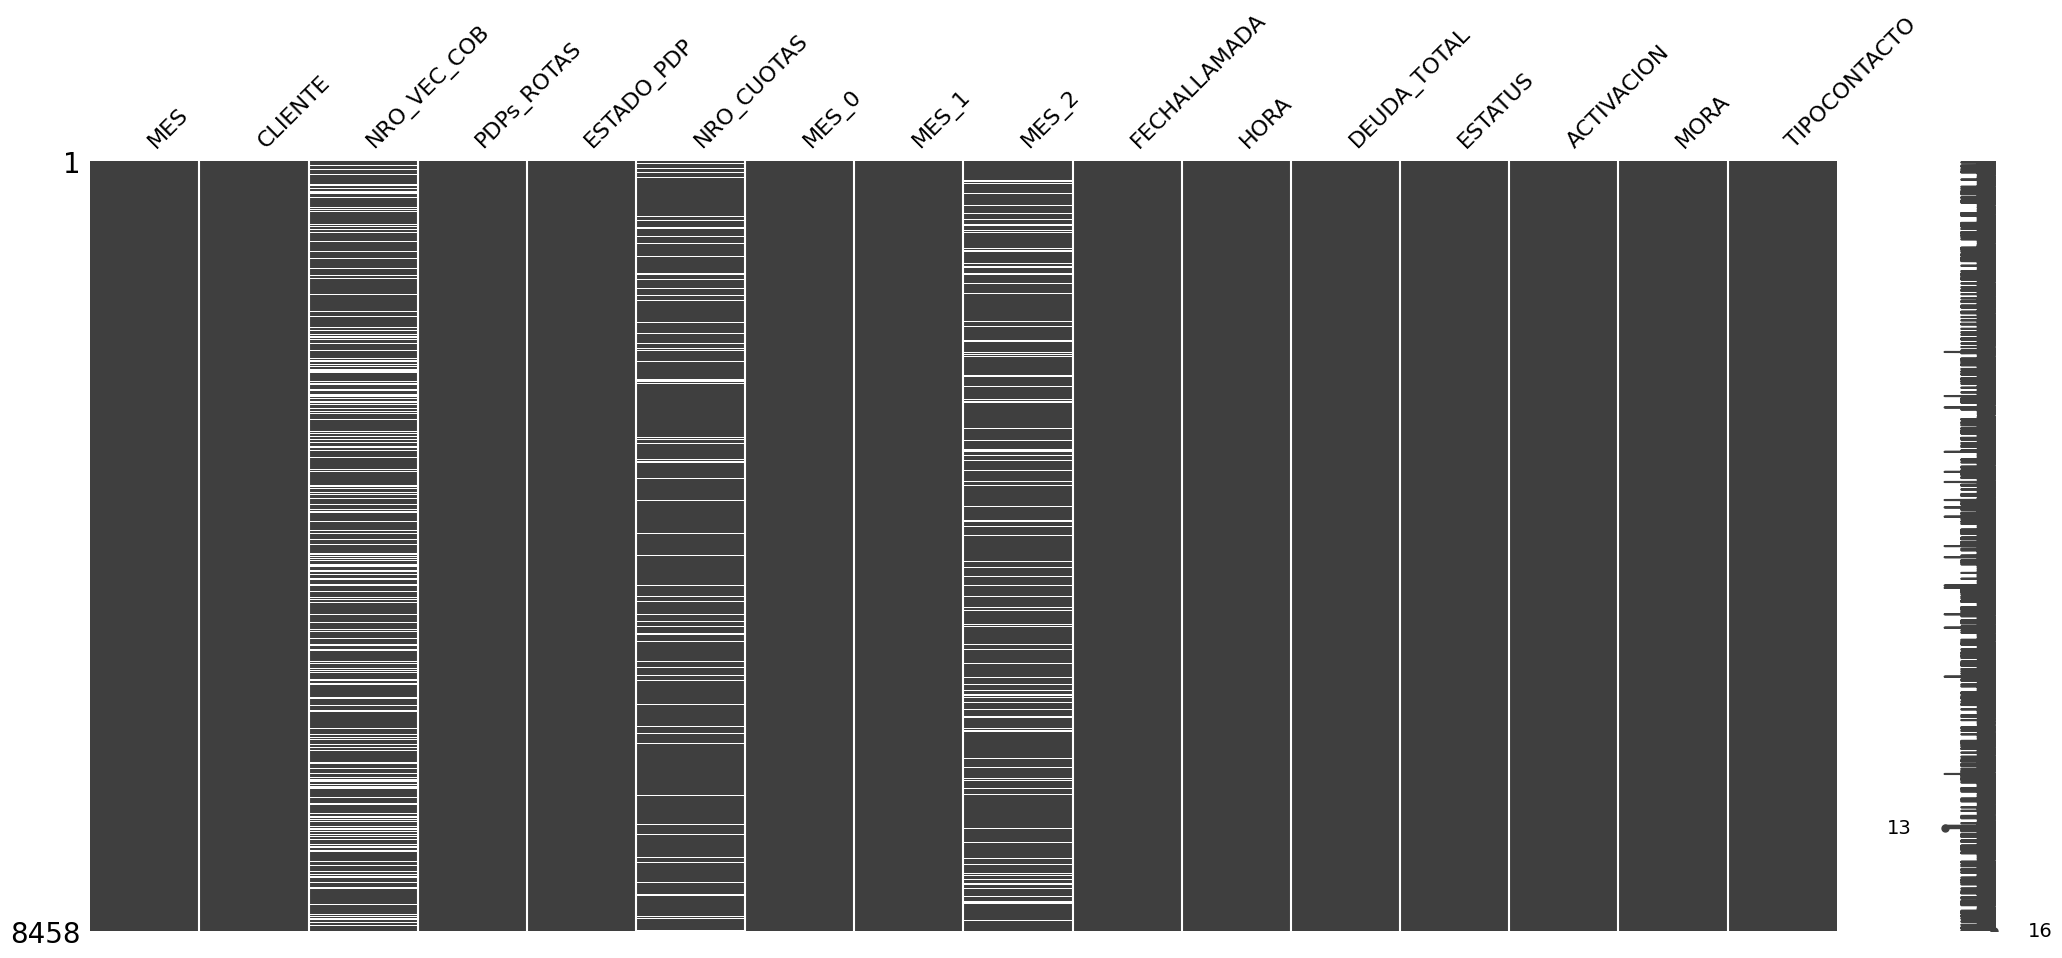

In [6]:
print("Null values per column:\n", data.isnull().sum())
msno.matrix(data)
plt.show()

In the dataset, several columns have null values. Specifically, the "NRO_VEC_COB" column has 2,082 missing values, the "NRO_CUOTAS" column contains 679 nulls, and the "MES_2" column shows 901 null entries. All other columns, such as "MES", "CLIENTE", "PDPs_ROTAS", and so on, appear to be complete with no missing values.

#### Univariate Descriptive Analysis for Numeric Variables

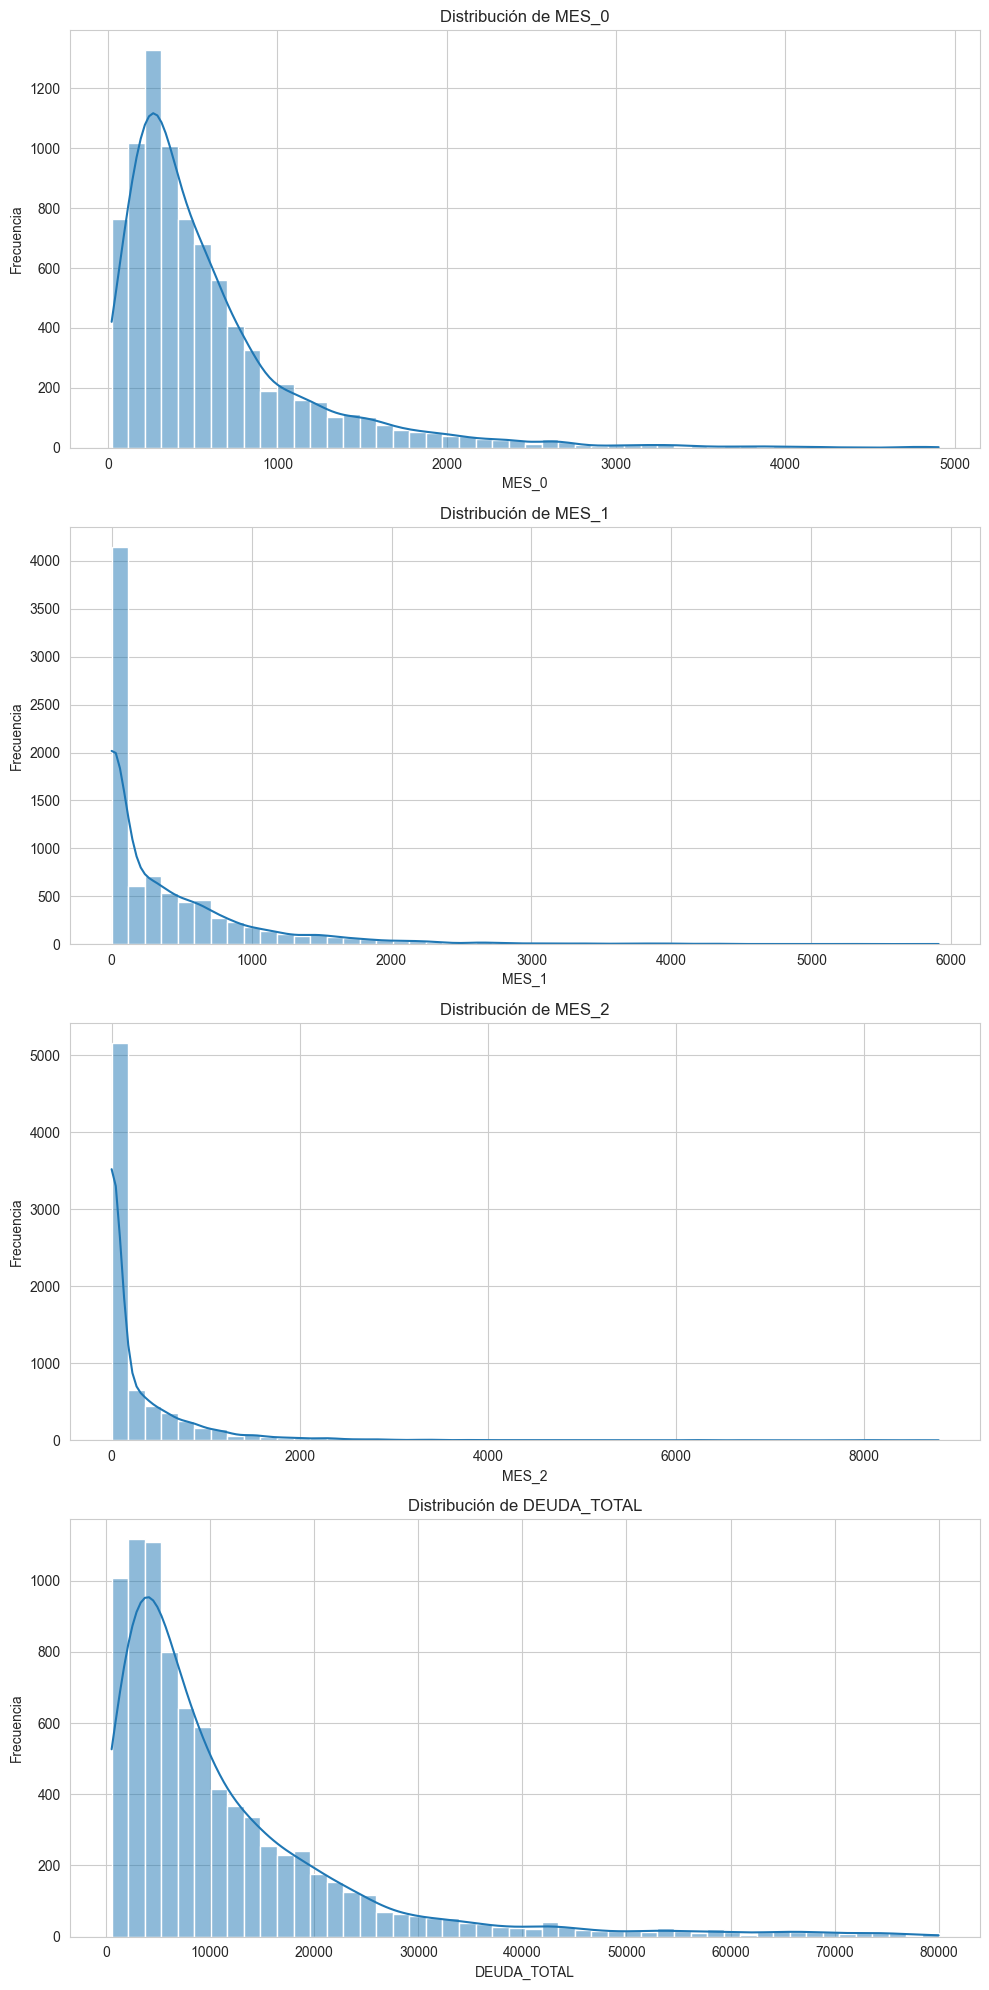

In [7]:
sns.set_style("whitegrid")
numeric_vars = ['MES_0', 'MES_1', 'MES_2', 'DEUDA_TOTAL'] #Definimos a las variables numéricas
fig, axes = plt.subplots(nrows=len(numeric_vars), figsize=(10, 20)) #graficamos las distribuciones de las variables numéricas
for i, var in enumerate(numeric_vars):
    sns.histplot(data[var], ax=axes[i], kde=True, bins=50)
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
plt.tight_layout()
plt.show()

MES_0, MES_1, MES_2:
These variables represent overdue debt amounts for the last three months. It can be observed that most of the amounts are concentrated in lower values, but there are some higher values extending to the right, indicating some skewness in the distribution.

DEUDA_TOTAL:
The distribution shows that most clients have smaller debts, but there are some with significantly larger debts.

#### Univariate Descriptive Analysis for Categorical Variables

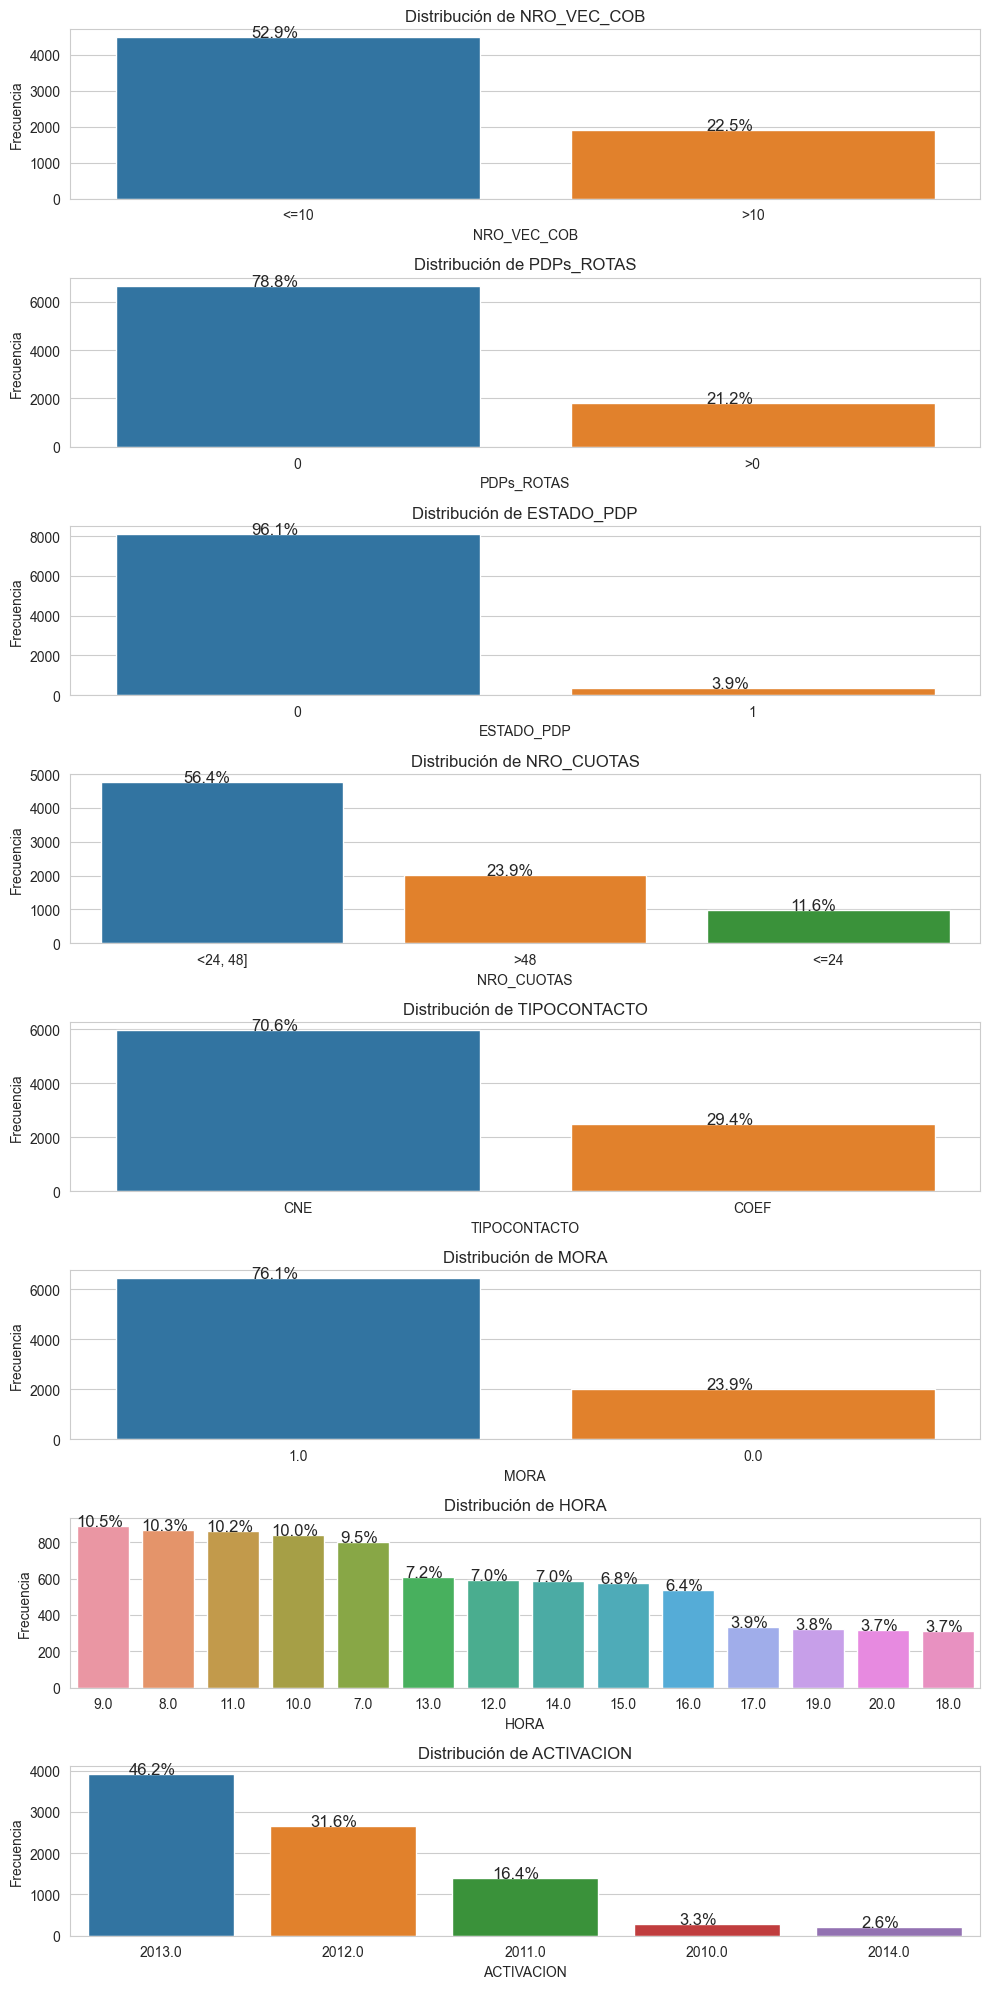

In [8]:
categorical_vars = ['NRO_VEC_COB', 'PDPs_ROTAS', 'ESTADO_PDP', 'NRO_CUOTAS', 'TIPOCONTACTO', 'MORA', 'HORA', 'ACTIVACION']

fig, axes = plt.subplots(nrows=len(categorical_vars), figsize=(10, 20))
for i, var in enumerate(categorical_vars):
    ax = sns.countplot(data=data, x=var, ax=axes[i], order=data[var].value_counts().index)
    axes[i].set_title(f'Distribución de {var}')
    axes[i].set_ylabel('Frecuencia')
    # Anotar el porcentaje en cada barra
    total = len(data)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12, ha="center")

plt.tight_layout()
plt.show()

NRO_VEC_COB:
52.9% of clients have fallen into collections 10 or fewer times, while 22.5% fell more than 10 times.

PDPs_ROTAS:
78.8% of clients have no broken promises, whereas 21.2% have at least one broken promise.

ESTADO_PDP:
96.1% of clients are without a payment promise, while 3.9% have a payment promise.

NRO_CUOTAS:
11.6% owe 24 or fewer installments; 56.4% owe between 25 and 48 installments; and 23.9% owe more than 48 installments.

ESTATUS:
100% of clients are account holders.

TIPOCONTACTO:
29.4% of calls to these clients were effective, while 70.6% were not.

MORA:
The majority of clients are in arrears (value 1) -> 76.14% are in arrears and the rest take the value of 0.

ACTIVACION:
Most activations occurred in the year 2012, followed by 2013 and 2011.

HORA:
Most calls are made between 8:00 and 17:00 hours.

### Multivariate Descriptive Analysis for Numeric Variables

---

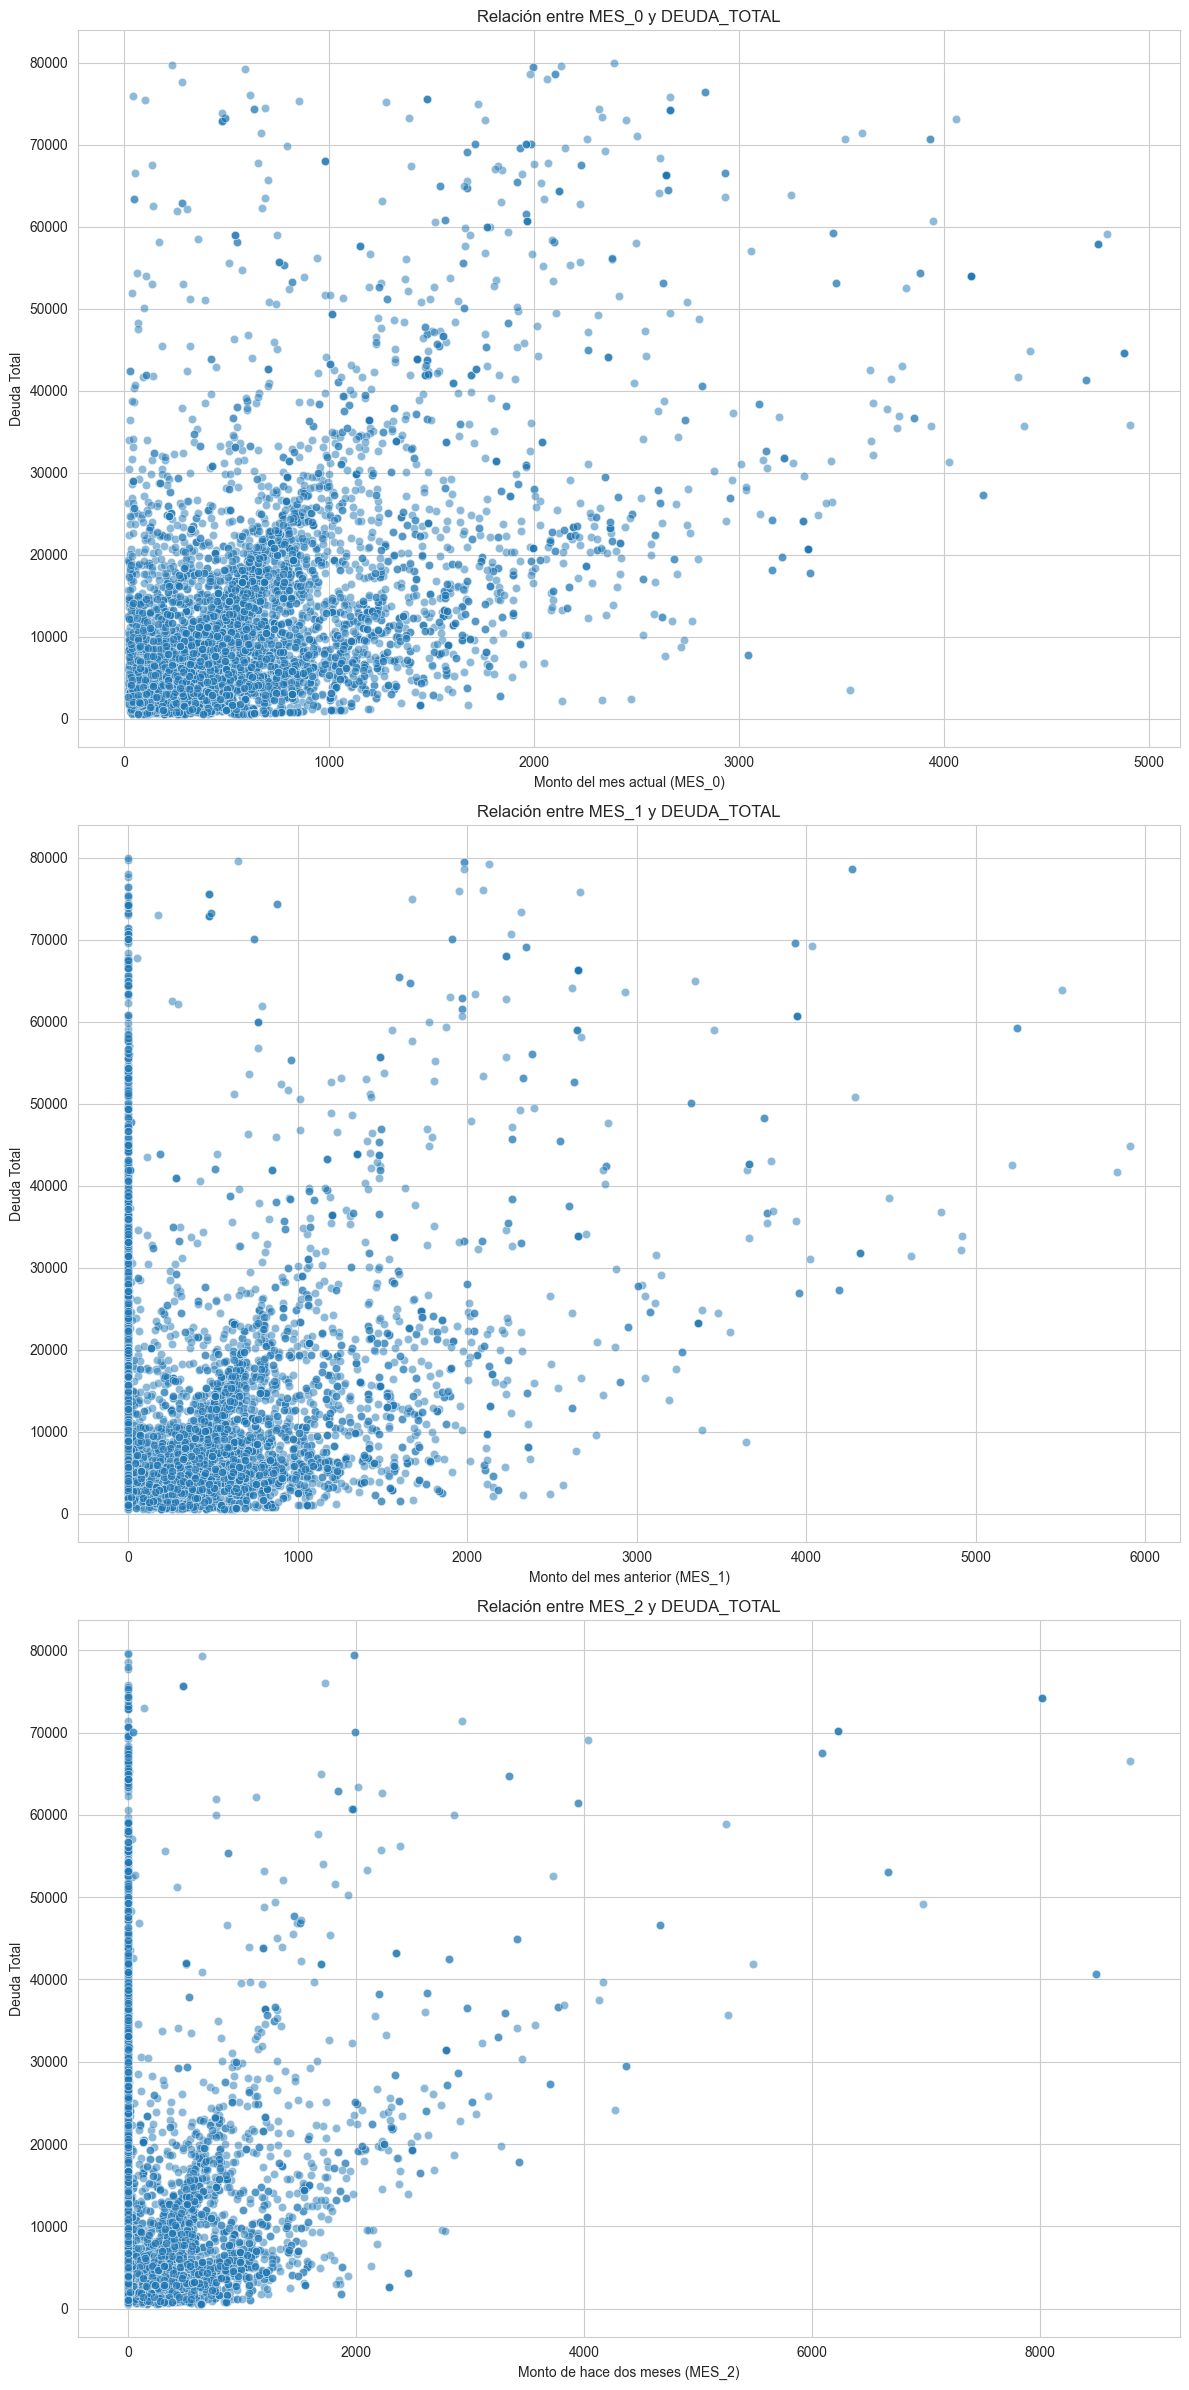

In [9]:
fig, axes = plt.subplots(nrows=3, figsize=(12, 24))
# Scatter plot entre MES_0 y DEUDA_TOTAL
sns.scatterplot(data=data, x='MES_0', y='DEUDA_TOTAL', ax=axes[0], alpha=0.5)
axes[0].set_title('Relación entre MES_0 y DEUDA_TOTAL')
axes[0].set_xlabel('Monto del mes actual (MES_0)')
axes[0].set_ylabel('Deuda Total')

# Scatter plot entre MES_1 y DEUDA_TOTAL
sns.scatterplot(data=data, x='MES_1', y='DEUDA_TOTAL', ax=axes[1], alpha=0.5)
axes[1].set_title('Relación entre MES_1 y DEUDA_TOTAL')
axes[1].set_xlabel('Monto del mes anterior (MES_1)')
axes[1].set_ylabel('Deuda Total')

# Scatter plot entre MES_2 y DEUDA_TOTAL
sns.scatterplot(data=data, x='MES_2', y='DEUDA_TOTAL', ax=axes[2], alpha=0.5)
axes[2].set_title('Relación entre MES_2 y DEUDA_TOTAL')
axes[2].set_xlabel('Monto de hace dos meses (MES_2)')
axes[2].set_ylabel('Deuda Total')

plt.tight_layout()
plt.show()

RELATIONSHIP BETWEEN MES_0 and DEUDA_TOTAL
A strong positive trend is observed. This suggests that as the current overdue debt (MES_0) increases, the client's total debt also tends to increase. There's a concentration of points at low values of MES_0, indicating that many clients have low current overdue debt amounts. However, there are also clients with higher current overdue debt values, and these generally have higher total debts.

Relationship between MES_1 and DEUDA_TOTAL:
The relationship between the overdue debt from the previous month (MES_1) and the total debt is positive but appears somewhat more scattered compared to MES_0. This suggests that the overdue debt from the previous month influences the total debt, but perhaps not as much as the current overdue debt. Like with MES_0, there's a concentration of points at low values of MES_1.

Relationship between MES_2 and DEUDA_TOTAL:
The trend between the overdue debt from two months ago (MES_2) and the total debt remains positive but appears more scattered compared to MES_0 and MES_1. This could indicate that the influence of the overdue debt from two months ago on the total debt is lesser than that of the more recent months. There's a similar concentration of points at low values of MES_2, akin to the other two graphs

In [10]:
# Before conducting a correlation analysis, I will encode the categorical variables using one-hot encoding:
data_encoded = pd.get_dummies(data, columns=['NRO_CUOTAS', 'HORA', 'ACTIVACION'], drop_first=False)
# Filter the dataset to retain only the encoded variables and the selected ones
final_data = data_encoded[['MES_0', 'MES_1', 'MES_2', 'DEUDA_TOTAL', 'TIPOCONTACTO', 'PDPs_ROTAS', 'MORA', 'NRO_VEC_COB', 'ESTADO_PDP' ] + [col for col in data_encoded.columns if col not in data.columns]]
final_data.head(5)

,MES_0,MES_1,MES_2,DEUDA_TOTAL,TIPOCONTACTO,PDPs_ROTAS,MORA,NRO_VEC_COB,ESTADO_PDP,"NRO_CUOTAS_<24, 48]",...,HORA_16.0,HORA_17.0,HORA_18.0,HORA_19.0,HORA_20.0,ACTIVACION_2010.0,ACTIVACION_2011.0,ACTIVACION_2012.0,ACTIVACION_2013.0,ACTIVACION_2014.0
0,244.86,0.00,245.26,3816.34,COEF,0,1.0,NaN,0,True,...,False,False,False,False,False,False,False,True,False,False
1,610.58,612.69,611.54,13620.50,COEF,0,1.0,<=10,0,False,...,False,False,False,False,False,False,False,True,False,False
2,2138.73,0.00,NaN,18968.50,CNE,>0,0.0,<=10,0,True,...,True,False,False,False,False,False,False,False,True,False
3,323.07,46.85,74.26,2459.84,CNE,0,0.0,>10,0,True,...,False,False,False,True,False,False,False,True,False,False
4,920.54,0.00,0.00,6591.76,CNE,0,0.0,<=10,0,True,...,False,False,False,False,False,False,False,False,True,False


In [11]:
# Convert the TIPOCONTACTO column to a numeric variable
final_data['TIPOCONTACTO'] = final_data['TIPOCONTACTO'].map({'COEF': 1, 'CNE': 0})
final_data['PDPs_ROTAS'] = final_data['PDPs_ROTAS'].map({'>0': 1, '0': 0}) # 1 IF GREATER THAN 0. 0 IF IT'S 0
final_data['NRO_VEC_COB'] = final_data['NRO_VEC_COB'].map({'>10': 1, '<=10': 0}) # 1 IF IT'S >= 10, 0 IF IT'S <10

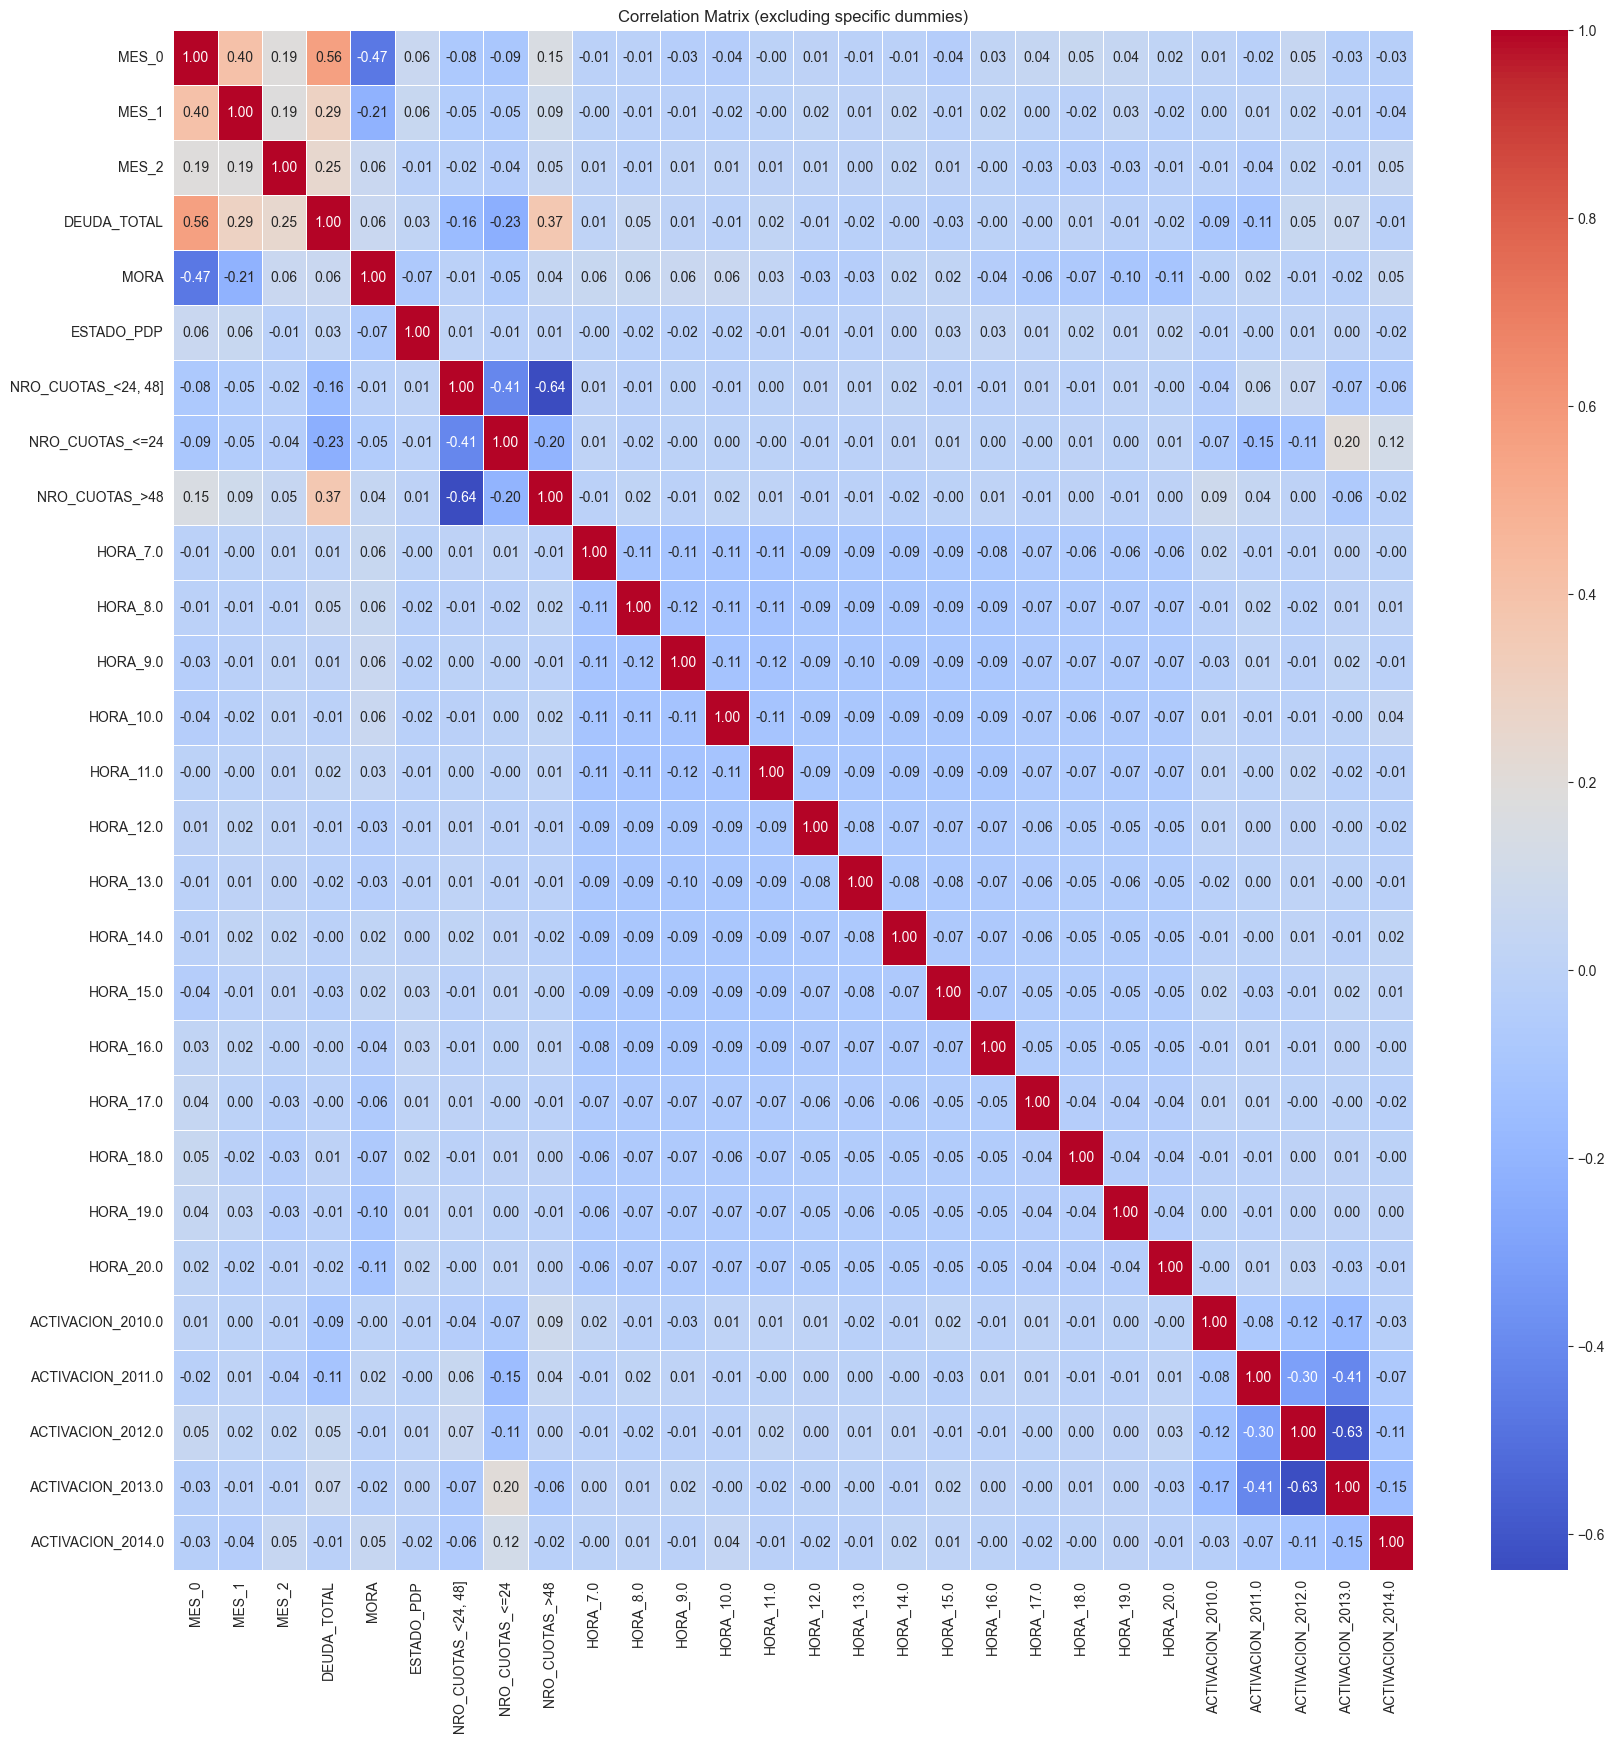

In [12]:
# Exclude the columns 'TIPOCONTACTO', 'PDPs_ROTAS', and 'NRO_VEC_COB' from the correlation analysis
columns_to_exclude = ['TIPOCONTACTO', 'PDPs_ROTAS', 'NRO_VEC_COB']
filtered_data = final_data.drop(columns=columns_to_exclude, errors='ignore')
# Conduct the correlation analysis on the filtered dataset
correlation_matrix_filtered = filtered_data.corr()
formatted_corr_filtered = correlation_matrix_filtered.applymap('{:.2f}'.format)
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix_filtered, annot=formatted_corr_filtered, fmt='s', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix (excluding specific dummies)")
plt.show()


Debt Variables (MES_0, MES_1, MES_2, DEUDA_TOTAL):
These variables show strong correlations among themselves, which makes sense since they represent debt amounts in different months and the total debt. For instance, MES_0 has a correlation of 0.56 with DEUDA_TOTAL.

Many of the encoded variables (resulting from one-hot encoding) show low correlations with the debt variables, indicating that they might not individually have a significant impact on the client's debt. However, in combination, these variables could provide valuable insight.

### ANALYSIS OF THE TARGET VARIABLE TIPOCONTACTO

---

In [14]:
# We have values in our table that are blank spaces; they're not necessarily null values (OPTIONAL TIP)
final_data = final_data.replace(" ", np.nan) # replace("The data you want to replace", "The data you want to replace it with")
final_data.dropna(inplace=True); # identified all the null values "NaN", they can be eliminated using the dropna() function
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5696 entries, 1 to 8457
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MES_0                5696 non-null   float64
 1   MES_1                5696 non-null   float64
 2   MES_2                5696 non-null   float64
 3   DEUDA_TOTAL          5696 non-null   float64
 4   TIPOCONTACTO         5696 non-null   int64  
 5   PDPs_ROTAS           5696 non-null   int64  
 6   MORA                 5696 non-null   float64
 7   NRO_VEC_COB          5696 non-null   float64
 8   ESTADO_PDP           5696 non-null   int64  
 9   NRO_CUOTAS_<24, 48]  5696 non-null   bool   
 10  NRO_CUOTAS_<=24      5696 non-null   bool   
 11  NRO_CUOTAS_>48       5696 non-null   bool   
 12  HORA_7.0             5696 non-null   bool   
 13  HORA_8.0             5696 non-null   bool   
 14  HORA_9.0             5696 non-null   bool   
 15  HORA_10.0            5696 non-null   bool  

In [16]:
from sklearn.utils import resample

upsample_data = final_data # Create a copy of our original data

majority = upsample_data[upsample_data["TIPOCONTACTO"]==0] # Samples from No churn category
minority = upsample_data[upsample_data["TIPOCONTACTO"]==1] # Samples from Churn category 27%

majority.shape, minority.shape

((3977, 31), (1719, 31))

#### Upsampling to balance the classes

In [17]:
minority_upsampled = resample(minority, replace=True, n_samples=3977,random_state=1) 
minority_upsampled.shape

(3977, 31)

In [18]:
upsample_data = pd.concat([majority,minority_upsampled])
print('Shape:',  upsample_data.shape)
print(upsample_data["TIPOCONTACTO"].value_counts())
upsample_data.info()

Shape: (7954, 31)
TIPOCONTACTO
0    3977
1    3977
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 7954 entries, 3 to 4328
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MES_0                7954 non-null   float64
 1   MES_1                7954 non-null   float64
 2   MES_2                7954 non-null   float64
 3   DEUDA_TOTAL          7954 non-null   float64
 4   TIPOCONTACTO         7954 non-null   int64  
 5   PDPs_ROTAS           7954 non-null   int64  
 6   MORA                 7954 non-null   float64
 7   NRO_VEC_COB          7954 non-null   float64
 8   ESTADO_PDP           7954 non-null   int64  
 9   NRO_CUOTAS_<24, 48]  7954 non-null   bool   
 10  NRO_CUOTAS_<=24      7954 non-null   bool   
 11  NRO_CUOTAS_>48       7954 non-null   bool   
 12  HORA_7.0             7954 non-null   bool   
 13  HORA_8.0             7954 non-null   bool   
 14  HORA_9.0        

In [19]:
# Partitioning the model
from sklearn.model_selection import train_test_split

label_upsample = upsample_data["TIPOCONTACTO"]
upsample_data.drop("TIPOCONTACTO",inplace = True, axis = 1)
X_train_upS, X_test_upS, y_train_upS, y_test_upS = train_test_split(upsample_data, label_upsample, test_size = 0.3, random_state = 42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

#### Parameter Tuning

In [20]:
Tree_parameters = {"max_depth": [3,4,5,6],
                   "min_samples_leaf":[1,2,3,4]}

LogReg_parameters = {
    "C":[0.25,0.5,0.75,1.0,1.5,2.0,2.5,3.0,4.0,10.0],
    "solver":["newton-cg", "lbfgs", "sag", "saga"],
    "tol":[0.01,0.001,0.0001,0.00001],
    "warm_start":["True","False"]}


RandomForest_parameters = {
    "n_estimators" :[10,15,20,25,30],
    "criterion": ["entropy","gini"],
    "max_depth" : [5,10,15],
    "min_samples_split":[2,4,8,16],
    "max_features":["sqrt","auto","log2"],
    "class_weight" : ["balanced_subsample","balanced"]}

In [21]:
from sklearn.model_selection import GridSearchCV # GridSearch is based on the grid search technique

def grid_search(clf, parameters, xTrain, Ytrain):

    grid_obj = GridSearchCV(clf, parameters, scoring='roc_auc', cv=5) # 'scoring' is used to specify which metric to use for comparing model iterations
    grid_fit = grid_obj.fit(xTrain, Ytrain) # Train
    best_clf = grid_fit.best_estimator_ # Returns the best result obtained in the iterations

    return best_clf


In [22]:
def apply_classifier(clf, xTrain, xTest, yTrain, yTest):

    clf.fit(xTrain, yTrain)  # Train the model
    predictions = clf.predict(xTest)  # Test on the test dataset
    conf_mtx = confusion_matrix(yTest, predictions)  # Confusion matrix of real vs. predicted test data

    f, axes = plt.subplots(ncols=2, figsize=(15, 5))  # Define the visualization area (2 plots)

    sns.heatmap(conf_mtx, annot=True, cbar=False, fmt="g", ax=axes[0])  # Format for the confusion matrix
    axes[0].set_xlabel('Predicted labels')  # X-axis title for confusion matrix
    axes[0].set_ylabel('True labels')  # Y-axis title for confusion matrix
    axes[0].set_title('Confusion Matrix Test');  # Title for confusion matrix
    axes[0].xaxis.set_ticklabels(['Not Churn', 'Churn']);  # X-axis distribution for confusion matrix
    axes[0].yaxis.set_ticklabels(['Not Churn', 'Churn']);  # Y-axis distribution for confusion matrix

    print(classification_report(yTest, predictions))  # Display results

    roc_auc = roc_auc_score(yTest, predictions)  # Calculate AUC
    print("AUC ROC : ", roc_auc)  # Display AUC result

    fpr, tpr, _ = roc_curve(yTest, predictions)  # Function to build ROC curve
    # fpr: false positive rate
    # tpr: true positive rate
    axes[1].plot(fpr, tpr, label="auc=" + str(roc_auc));  # Code to display AUC result on plot
    axes[1].plot([0, 1], [0, 1])  # Plot formatting
    plt.xlabel('False Positive Rate')  # X-axis title
    plt.ylabel('True Positive Rate')  # Y-axis title
    plt.title('ROC')  # Plot title


### **Decision Tree**

              precision    recall  f1-score   support

           0       0.85      0.68      0.76      1221
           1       0.72      0.87      0.79      1166

    accuracy                           0.78      2387
   macro avg       0.79      0.78      0.77      2387
weighted avg       0.79      0.78      0.77      2387

AUC ROC :  0.7772588197116499


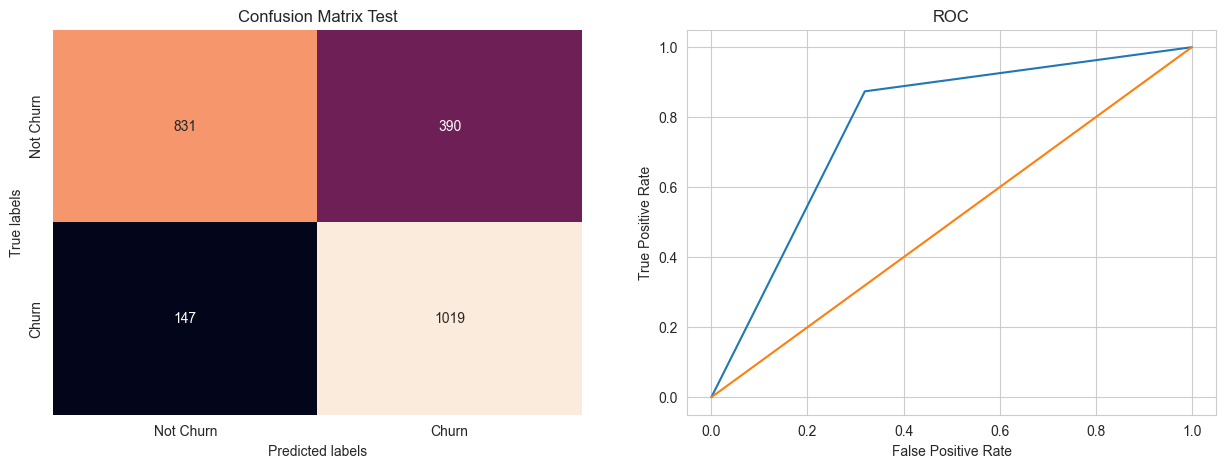

In [23]:
decision_tree_ups = DecisionTreeClassifier()
apply_classifier(decision_tree_ups,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

The overall accuracy of the model is 78%. This means that the model made correct predictions for 78% of the observations in the test dataset.

The AUC for the ROC curve is 0.7777. The value of 0.7777 indicates good discriminative power of the model.

#### **Logistic Regression**

              precision    recall  f1-score   support

           0       0.60      0.59      0.60      1221
           1       0.58      0.59      0.58      1166

    accuracy                           0.59      2387
   macro avg       0.59      0.59      0.59      2387
weighted avg       0.59      0.59      0.59      2387

AUC ROC :  0.5906657085902369


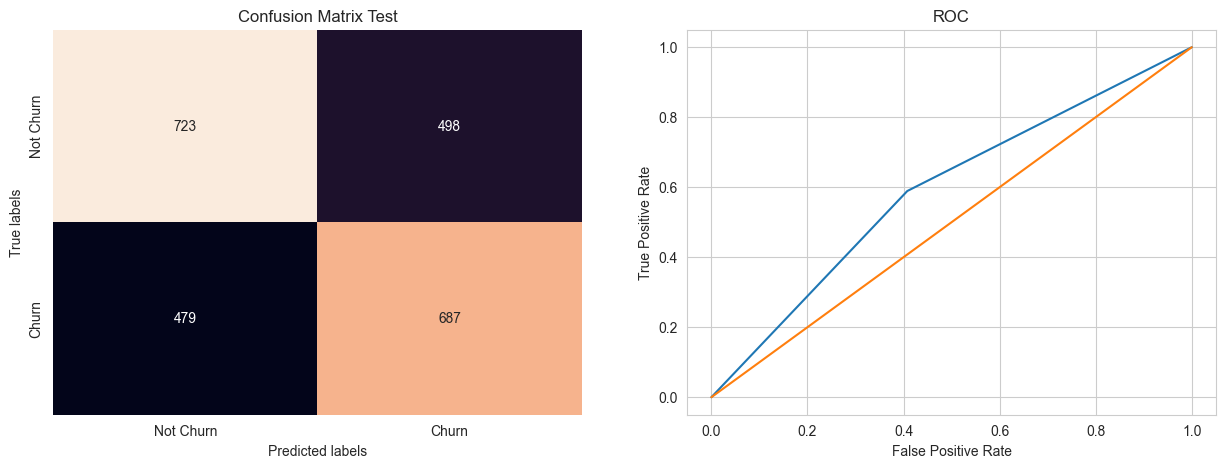

In [24]:
logistic_reg = LogisticRegression()
apply_classifier(logistic_reg,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

The overall accuracy of the model is 59%. This indicates that the model made correct predictions for 59% of the observations in the test dataset.

The AUC ROC suggests that the model is slightly better than a random classifier (which would have an AUC of 0.5), but it's still quite low, indicating limited discriminative power of the model.

#### **Random Forest**

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1221
           1       0.78      0.88      0.83      1166

    accuracy                           0.82      2387
   macro avg       0.83      0.83      0.82      2387
weighted avg       0.83      0.82      0.82      2387

AUC ROC :  0.8254021603078208


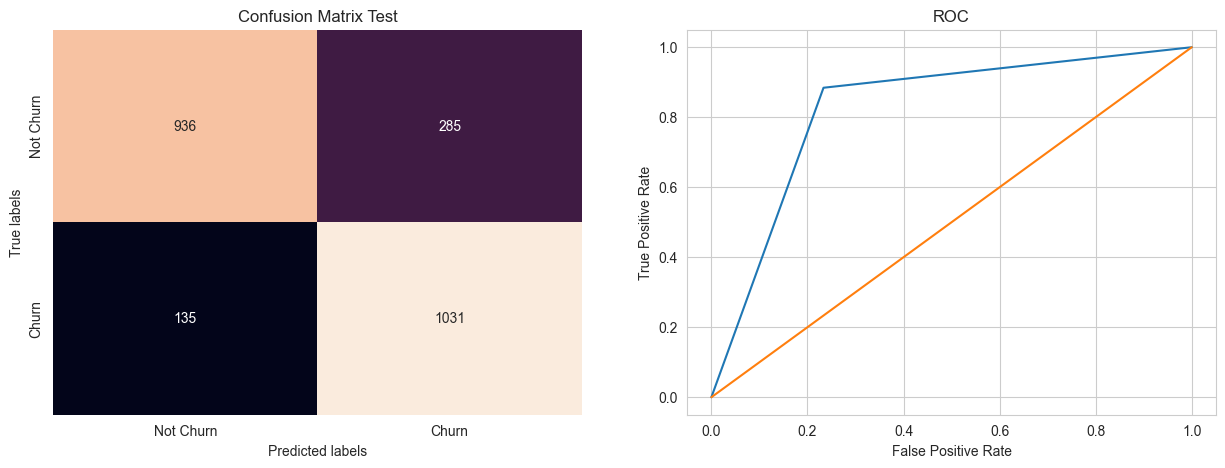

In [25]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train_upS, X_test_upS, y_train_upS, y_test_upS)

The overall accuracy of the model is 82%. This indicates that the model made correct predictions for 82% of the observations in the test dataset.

The AUC ROC value for the Random Forest is 0.8254. This indicates a good discriminative power of the model.

### **Conclusions**

---

In summary, Random Forest has the highest precision for both classes, followed by Decision Tree, and then Logistic Regression. This suggests that, overall, Random Forest is the most accurate model for predicting the classes. Furthermore, Random Forest leads with an AUC ROC of 0.8254, indicating good discriminative power. Decision Tree has a decent AUC ROC of 0.7777. However, Logistic Regression has a lower AUC ROC of 0.5907, suggesting limited discriminative power compared to the other two models.

In this regard, the Random Forest model is the most suitable for identifying patterns that may influence contactability. Additionally, from the correlation matrix and feature importance (which can be extracted from the Random Forest model), variables such as HORA, ACTIVACION, NRO_CUOTAS, among others, could have a significant impact on contactability.